In [2]:
import csv 
import pandas as pd

# convert to array
with open('../E-Jeep Data/Ejeep Sept 18.csv', 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    data = list(csv_reader)
    
# get track data and remove waypoints
for i,row in enumerate(data):
    if(len(row) > 0 and row[0] == 'Track'):
        data = data[i+1:]
        break

# remove header
header = data[0]
data = data[1:]

# convert to float and breakdown time data
for i in range(len(data)):
    data[i][3] = float(data[i][3])
    data[i][4] = float(data[i][4])
    
    # print(data[i]+data[i][1].replace('/', ' ').replace(':', ' ').replace('-', ' ').replace('.', ' ').split())
    
    # hack to get individual time data
    timelog = [int(x) for x in data[i][1].replace('/', ' ').replace(':', ' ').replace('-', ' ').replace('.', ' ').split()]
    data[i] += timelog

header += ['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second', 'Millisecond']   

# convert to dataframe
df = pd.DataFrame(data, columns=header)
df

,Date(GMT),Date(Local),Time(sec),Latitude,Longitude,Horizontal Accuracy(m),Altitude(m),Vertical Accuracy(m),Distance(m),Speed(m/s),...,Heading Accuracy(deg),Glide Ratio,Heart Rate (bpm),Year,Month,Day,Hour,Minute,Second,Millisecond
0,2023-09-18 04:52:44.00,2023-09-18 12:52:44.00,0.0003160238265991211,14.634736,121.076293,3.535533905932737,60.64281845092773,3,0,0,...,11.94986534118652,1018.12073776826,0,2023,9,18,12,52,44,0
1,2023-09-18 04:52:45.00,2023-09-18 12:52:45.00,0.5302410125732422,14.634736,121.076293,4.612905477116144,60.64281840994954,3.541982508706206,0,0,...,11.94986534118652,296.1881525974027,0,2023,9,18,12,52,45,0
2,2023-09-18 04:52:46.00,2023-09-18 12:52:46.00,1.522344946861267,14.634737,121.076293,4.612905477623176,61.00182719901204,3.541982508045873,0.04856229260522659,0,...,11.94986534118652,-171.6421289682452,0,2023,9,18,12,52,46,0
3,2023-09-18 04:52:47.00,2023-09-18 12:52:47.00,2.522934913635254,14.634726,121.076292,4.612905509348495,60.74187846761197,3.541982466728363,1.215731137435719,0,...,11.94986534118652,12.49411691942023,0,2023,9,18,12,52,47,0
4,2023-09-18 04:52:48.00,2023-09-18 12:52:48.00,3.522957921028137,14.634731,121.076293,4.612905492281161,61.36095805745572,3.541982488956028,1.796300261823075,0,...,11.91374492645264,3.42105642573424,0,2023,9,18,12,52,48,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3922,2023-09-18 05:58:02.00,2023-09-18 13:58:02.00,3917.535175919533,14.637880,121.074936,4.73619083637236,57.87492060568184,3.375356780290243,7520.7861368778,0.1596273314907966,...,13.85204792022705,200.0795705317799,0,2023,9,18,13,58,2,0
3923,2023-09-18 05:58:03.00,2023-09-18 13:58:03.00,3918.534995913506,14.637880,121.074938,4.734945825531293,58.17456339392811,3.377103057662383,7521.017005976285,0.05906419740085866,...,13.85204792022705,-95.70590328108769,0,2023,9,18,13,58,3,0
3924,2023-09-18 05:58:04.00,2023-09-18 13:58:04.00,3919.535025000572,14.637883,121.074939,4.735744249539151,58.36344206798822,3.375983328712644,7521.375289896265,0.1430991094213362,...,13.85204792022705,-47.32762001188367,0,2023,9,18,13,58,4,0
3925,2023-09-18 05:58:05.00,2023-09-18 13:58:05.00,3920.54584300518,14.637889,121.074935,4.734464033270184,58.48317391145974,3.377778463792417,7522.141683490589,0.1146652024744894,...,13.85204792022705,-168.5333941617361,0,2023,9,18,13,58,5,0


In [4]:
# normalize df
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
df[['Latitude','Longitude']] = scaler.fit_transform(df[['Latitude','Longitude']])
# test_data_scaled = scaler.transform(test_data[['lag_1', 'lag_2', 'lag_3', 'day_of_week', 'month']])
df


,Date(GMT),Date(Local),Time(sec),Latitude,Longitude,Horizontal Accuracy(m),Altitude(m),Vertical Accuracy(m),Distance(m),Speed(m/s),...,Heading Accuracy(deg),Glide Ratio,Heart Rate (bpm),Year,Month,Day,Hour,Minute,Second,Millisecond
0,2023-09-18 04:52:44.00,2023-09-18 12:52:44.00,0.0003160238265991211,0.007495,0.252595,3.535533905932737,60.64281845092773,3,0,0,...,11.94986534118652,1018.12073776826,0,2023,9,18,12,52,44,0
1,2023-09-18 04:52:45.00,2023-09-18 12:52:45.00,0.5302410125732422,0.007495,0.252595,4.612905477116144,60.64281840994954,3.541982508706206,0,0,...,11.94986534118652,296.1881525974027,0,2023,9,18,12,52,45,0
2,2023-09-18 04:52:46.00,2023-09-18 12:52:46.00,1.522344946861267,0.007651,0.252595,4.612905477623176,61.00182719901204,3.541982508045873,0.04856229260522659,0,...,11.94986534118652,-171.6421289682452,0,2023,9,18,12,52,46,0
3,2023-09-18 04:52:47.00,2023-09-18 12:52:47.00,2.522934913635254,0.005934,0.252430,4.612905509348495,60.74187846761197,3.541982466728363,1.215731137435719,0,...,11.94986534118652,12.49411691942023,0,2023,9,18,12,52,47,0
4,2023-09-18 04:52:48.00,2023-09-18 12:52:48.00,3.522957921028137,0.006715,0.252595,4.612905492281161,61.36095805745572,3.541982488956028,1.796300261823075,0,...,11.91374492645264,3.42105642573424,0,2023,9,18,12,52,48,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3922,2023-09-18 05:58:02.00,2023-09-18 13:58:02.00,3917.535175919533,0.498438,0.029000,4.73619083637236,57.87492060568184,3.375356780290243,7520.7861368778,0.1596273314907966,...,13.85204792022705,200.0795705317799,0,2023,9,18,13,58,2,0
3923,2023-09-18 05:58:03.00,2023-09-18 13:58:03.00,3918.534995913506,0.498438,0.029329,4.734945825531293,58.17456339392811,3.377103057662383,7521.017005976285,0.05906419740085866,...,13.85204792022705,-95.70590328108769,0,2023,9,18,13,58,3,0
3924,2023-09-18 05:58:04.00,2023-09-18 13:58:04.00,3919.535025000572,0.498907,0.029494,4.735744249539151,58.36344206798822,3.375983328712644,7521.375289896265,0.1430991094213362,...,13.85204792022705,-47.32762001188367,0,2023,9,18,13,58,4,0
3925,2023-09-18 05:58:05.00,2023-09-18 13:58:05.00,3920.54584300518,0.499844,0.028835,4.734464033270184,58.48317391145974,3.377778463792417,7522.141683490589,0.1146652024744894,...,13.85204792022705,-168.5333941617361,0,2023,9,18,13,58,5,0


In [5]:
X = df[:-1][['Latitude']]#, 'Longitude']]#, 'Minute', 'Second']]#, 'Altitude(m)','Speed(m/s)', 'True Heading(deg)']]
X

,Latitude
0,0.007495
1,0.007495
2,0.007651
3,0.005934
4,0.006715
...,...
3921,0.497814
3922,0.498438
3923,0.498438
3924,0.498907


In [6]:
# Create 10 lag features
for i in range(1,61):
    X[f'Latitude_Lag_{i}'] = df['Latitude'].shift(i)
    # X[f'Longitude_Lag_{i}'] = df['Longitude'].shift(i)
X = X.dropna()

# Y is the next steps
Y = X.iloc[1:][['Latitude']]#, 'Longitude']]
# nextX is the last 2 rows but dataframe
nextX = X.iloc[[-1]]
X = X.iloc[:-1]

#shape of X and Y
X, Y

(      Latitude  Latitude_Lag_1  Latitude_Lag_2  Latitude_Lag_3  \
 60    0.001718        0.001405        0.000937        0.000625   
 61    0.002342        0.001718        0.001405        0.000937   
 62    0.002186        0.002342        0.001718        0.001405   
 63    0.002498        0.002186        0.002342        0.001718   
 64    0.001874        0.002498        0.002186        0.002342   
 ...        ...             ...             ...             ...   
 3920  0.498282        0.497970        0.496408        0.497658   
 3921  0.497814        0.498282        0.497970        0.496408   
 3922  0.498438        0.497814        0.498282        0.497970   
 3923  0.498438        0.498438        0.497814        0.498282   
 3924  0.498907        0.498438        0.498438        0.497814   
 
       Latitude_Lag_4  Latitude_Lag_5  Latitude_Lag_6  Latitude_Lag_7  \
 60          0.001249        0.001718        0.001874        0.002498   
 61          0.000625        0.001249        0.0

In [7]:
# get X 2nd column
X.iloc[:,1:]

,Latitude_Lag_1,Latitude_Lag_2,Latitude_Lag_3,Latitude_Lag_4,Latitude_Lag_5,Latitude_Lag_6,Latitude_Lag_7,Latitude_Lag_8,Latitude_Lag_9,Latitude_Lag_10,...,Latitude_Lag_51,Latitude_Lag_52,Latitude_Lag_53,Latitude_Lag_54,Latitude_Lag_55,Latitude_Lag_56,Latitude_Lag_57,Latitude_Lag_58,Latitude_Lag_59,Latitude_Lag_60
60,0.001405,0.000937,0.000625,0.001249,0.001718,0.001874,0.002498,0.002811,0.002967,0.003279,...,0.004685,0.004997,0.004997,0.005465,0.006871,0.006715,0.005934,0.007651,0.007495,0.007495
61,0.001718,0.001405,0.000937,0.000625,0.001249,0.001718,0.001874,0.002498,0.002811,0.002967,...,0.004685,0.004685,0.004997,0.004997,0.005465,0.006871,0.006715,0.005934,0.007651,0.007495
62,0.002342,0.001718,0.001405,0.000937,0.000625,0.001249,0.001718,0.001874,0.002498,0.002811,...,0.004841,0.004685,0.004685,0.004997,0.004997,0.005465,0.006871,0.006715,0.005934,0.007651
63,0.002186,0.002342,0.001718,0.001405,0.000937,0.000625,0.001249,0.001718,0.001874,0.002498,...,0.004060,0.004841,0.004685,0.004685,0.004997,0.004997,0.005465,0.006871,0.006715,0.005934
64,0.002498,0.002186,0.002342,0.001718,0.001405,0.000937,0.000625,0.001249,0.001718,0.001874,...,0.004216,0.004060,0.004841,0.004685,0.004685,0.004997,0.004997,0.005465,0.006871,0.006715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3920,0.497970,0.496408,0.497658,0.497814,0.497970,0.498282,0.498595,0.497970,0.499688,0.498751,...,0.482979,0.482667,0.481574,0.479076,0.475640,0.472361,0.469706,0.467208,0.463773,0.459557
3921,0.498282,0.497970,0.496408,0.497658,0.497814,0.497970,0.498282,0.498595,0.497970,0.499688,...,0.482355,0.482979,0.482667,0.481574,0.479076,0.475640,0.472361,0.469706,0.467208,0.463773
3922,0.497814,0.498282,0.497970,0.496408,0.497658,0.497814,0.497970,0.498282,0.498595,0.497970,...,0.481730,0.482355,0.482979,0.482667,0.481574,0.479076,0.475640,0.472361,0.469706,0.467208
3923,0.498438,0.497814,0.498282,0.497970,0.496408,0.497658,0.497814,0.497970,0.498282,0.498595,...,0.482667,0.481730,0.482355,0.482979,0.482667,0.481574,0.479076,0.475640,0.472361,0.469706


In [8]:
Y

,Latitude
61,0.002342
62,0.002186
63,0.002498
64,0.001874
65,0.002811
...,...
3921,0.497814
3922,0.498438
3923,0.498438
3924,0.498907


# Attempt 1
XGBRegressor -> fit -> predict

In [15]:
import xgboost as xgb

params = {
    'objective': 'reg:squarederror',  # Specify the regression objective
    'n_estimators': 100,             # Number of boosting rounds (trees)
    'learning_rate': 0.1,           # Step size shrinkage to prevent overfitting
    'max_depth': 20,                 # Maximum depth of each tree
    'min_child_weight': 0.5,          # Minimum sum of instance weight (hessian) needed in a child
    'gamma': 0.1,                     # Minimum loss reduction required to make a further partition on a leaf node
    'subsample': 0.8,               # Fraction of samples used for training each tree
    'colsample_bytree': 0.8,        # Fraction of features used for training each tree
    'random_state': 42               # Seed for reproducibility
}

reg = xgb.XGBRegressor(**params)
reg.fit(X, Y, verbose=True)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=20, max_leaves=None,
             min_child_weight=0.5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

ImportError: You must install graphviz to plot tree

<Figure size 4800x3000 with 0 Axes>

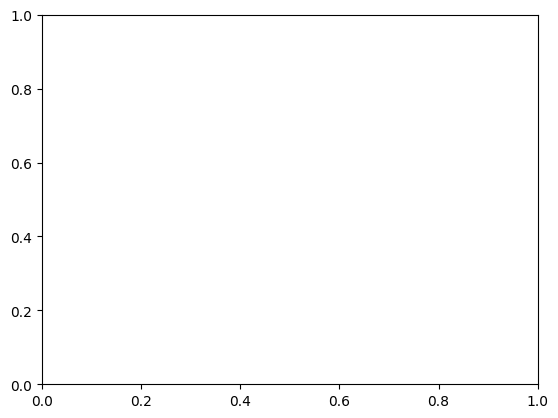

In [9]:
# !pip install graphviz
import matplotlib.pyplot as plt
import matplotlib

plt.figure(figsize=(16, 10), dpi=300)
xgb.plot_tree(reg, num_trees=0, rankdir='LR')  # num_trees specifies the tree index (0 for the first tree)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(150, 100)
fig.show()

In [ ]:
# copy X to predictions
predictions = X.copy()

for i in range(1000):
    nextX = predictions.iloc[[-1]]
    y_pred = reg.predict(nextX)
    
    # if(nextX['Latitude'].values[0] == y_pred[0][0] and nextX['Longitude'].values[0] == y_pred[0][1]):
    #     print('same')
    #     break

    # shift nextX to the right
    # !don't run multiple times because nextX shifts to the right everytime
    # nextX = nextX.shift(2, axis=1)
    nextX = nextX.shift(1, axis=1)

    # set nextX latitude and longitude to y_pred
    # nextX[['Latitude', 'Longitude']] = y_pred
    nextX[['Latitude']] = y_pred

    # add another row to predictions
    predictions = predictions.append(nextX, ignore_index=True)

predictions

AttributeError: 'DataFrame' object has no attribute 'append'

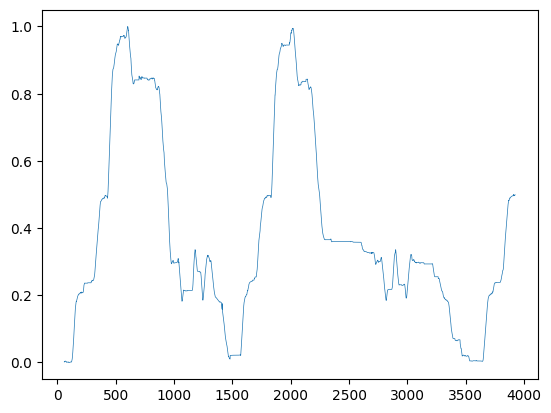

In [ ]:
# Plot 2d array of latitude and longitude on a map
import matplotlib.pyplot as plt

# plot
# plt.plot(X['Longitude'], X['Latitude'], linewidth=0.5)
# plt.plot(predictions[len(X):]['Longitude'], predictions[len(X):]['Latitude'], linewidth=1.5)
plt.plot(X['Latitude'], linewidth=0.5)
plt.plot(predictions[len(X):]['Latitude'], linewidth=1.5)
plt.show()

# Attempt 2
data -> xgb.DMatrix -> xgb.train -> predict

In [ ]:
import xgboost as xgb

# Create regression matrices
dtrain_reg = xgb.DMatrix(X, Y, enable_categorical=True)
# dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [ ]:
# Define hyperparameters
params = {"objective": "reg:squarederror"} # , "tree_method": "gpu_hist"}

n = 1000

# evals = [(dtrain_reg, "train"), (dtest_reg, "validation")]

model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
   # evals=evals,
   verbose_eval=10,
   # early_stopping_rounds=20,
)

In [ ]:
results = xgb.cv(
   params, 
   dtrain_reg,
   num_boost_round=n,
   nfold=5,
   verbose_eval=10
)
results

[0]	train-rmse:0.19798+0.00160	test-rmse:0.19805+0.00663
[10]	train-rmse:0.00645+0.00003	test-rmse:0.00688+0.00026
[20]	train-rmse:0.00180+0.00004	test-rmse:0.00302+0.00022
[30]	train-rmse:0.00158+0.00004	test-rmse:0.00295+0.00022
[40]	train-rmse:0.00144+0.00003	test-rmse:0.00291+0.00020
[50]	train-rmse:0.00132+0.00004	test-rmse:0.00290+0.00020
[60]	train-rmse:0.00125+0.00003	test-rmse:0.00290+0.00020
[70]	train-rmse:0.00124+0.00003	test-rmse:0.00290+0.00020
[80]	train-rmse:0.00124+0.00003	test-rmse:0.00290+0.00020
[90]	train-rmse:0.00124+0.00003	test-rmse:0.00290+0.00020
[100]	train-rmse:0.00124+0.00003	test-rmse:0.00290+0.00020
[110]	train-rmse:0.00124+0.00003	test-rmse:0.00290+0.00020
[120]	train-rmse:0.00124+0.00003	test-rmse:0.00290+0.00020
[130]	train-rmse:0.00124+0.00003	test-rmse:0.00290+0.00020
[140]	train-rmse:0.00124+0.00003	test-rmse:0.00290+0.00020
[150]	train-rmse:0.00124+0.00003	test-rmse:0.00290+0.00020
[160]	train-rmse:0.00124+0.00003	test-rmse:0.00290+0.00020
[170]	tr

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.197976,0.001595,0.198051,0.006629
1,0.139099,0.001109,0.139161,0.004738
2,0.097774,0.000781,0.097931,0.003308
3,0.068762,0.000543,0.068872,0.002405
4,0.048407,0.000380,0.048510,0.001723
...,...,...,...,...
995,0.001239,0.000030,0.002896,0.000204
996,0.001239,0.000030,0.002896,0.000204
997,0.001239,0.000030,0.002896,0.000204
998,0.001239,0.000030,0.002896,0.000204


In [ ]:
print(dtrain_reg)

ImportError: You must install graphviz to plot tree

<Figure size 16000x10000 with 0 Axes>

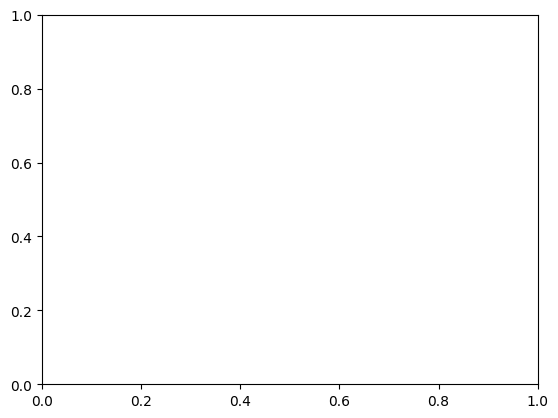

In [ ]:
# !pip install graphviz
import matplotlib.pyplot as plt
import matplotlib

plt.figure(figsize=(16, 10), dpi=1000)
xgb.plot_tree(model, num_trees=0, rankdir='LR')  # num_trees specifies the tree index (0 for the first tree)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(150, 100)
fig.show()

In [ ]:
import xgboost as xgb

# Create regression matrices
# dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X)
dtest_reg

In [ ]:
# copy X to predictions
predictions = X.copy()

for i in range(1000):
    nextX = predictions.iloc[[-1]]
    nextXDMatrix = xgb.DMatrix(nextX)
    
    y_pred = model.predict(nextXDMatrix)
    
    # if(nextX['Latitude'].values[0] == y_pred[0][0] and nextX['Longitude'].values[0] == y_pred[0][1]):
    #     print('same')
    #     break

    # shift nextX to the right
    # !don't run multiple times because nextX shifts to the right everytime
    nextX = nextX.shift(2, axis=1)

    # set nextX latitude and longitude to y_pred
    nextX[['Latitude', 'Longitude']] = y_pred

    # add another row to predictions
    predictions = predictions.append(nextX, ignore_index=True)

predictions

ValueError: Columns must be same length as key

In [ ]:
# Plot 2d array of latitude and longitude on a map
import matplotlib.pyplot as plt

# plot
plt.plot(X['Longitude'], X['Latitude'], linewidth=0.5)
plt.plot(predictions[len(X):]['Longitude'], predictions[len(X):]['Latitude'], linewidth=1, color="red")
plt.show()

KeyError: 'Longitude'

# Attempt 3 
https://machinelearningmastery.com/xgboost-for-time-series-forecasting/

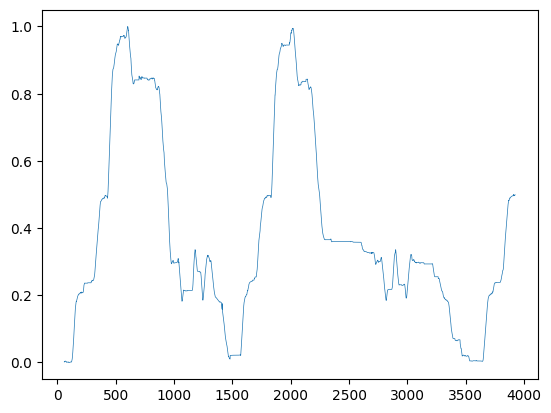

In [9]:
# Plot 2d array of latitude and longitude on a map
import matplotlib.pyplot as plt

# plot
plt.plot(X['Latitude'], linewidth=0.5)
# plt.plot(predictions[len(X):]['Longitude'], predictions[len(X):]['Latitude'], linewidth=1, color="red")
plt.show()

In [10]:
# xgboost
import xgboost
print("xgboost", xgboost.__version__)

xgboost 2.0.0


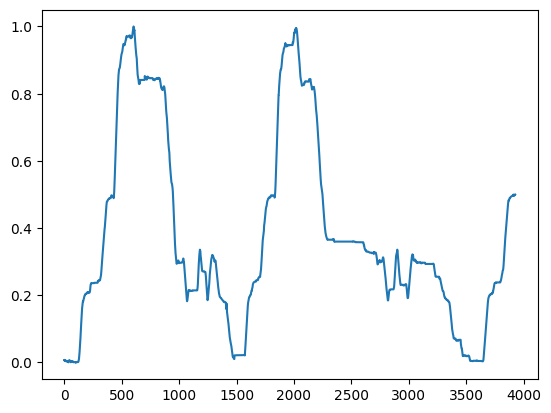

In [11]:
# lets focus on Latitude only
X3 = df['Latitude']
X3

# convert X3 to list
X3 = X3.tolist()
plt.plot(X3)

In [12]:
# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = pd.concat(cols, axis=1)
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg.values

lag = 60
X3 = series_to_supervised(X3, lag)
X3

array([[0.00749532, 0.00749532, 0.00765147, ..., 0.00093691, 0.00140537,
        0.00171768],
       [0.00749532, 0.00765147, 0.00593379, ..., 0.00140537, 0.00171768,
        0.00234229],
       [0.00765147, 0.00593379, 0.00671455, ..., 0.00171768, 0.00234229,
        0.00218613],
       ...,
       [0.47236102, 0.47564022, 0.47907558, ..., 0.49843848, 0.49843848,
        0.49890693],
       [0.47564022, 0.47907558, 0.48157402, ..., 0.49843848, 0.49890693,
        0.49984385],
       [0.47907558, 0.48157402, 0.48266708, ..., 0.49890693, 0.49984385,
        0.49984385]])

In [ ]:
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test, :], data[-n_test:, :]

In [13]:
# import asarray
from numpy import asarray

# fit an xgboost model and make a one step prediction
def xgboost_forecast(train, testX):
	# transform list into array
	train = asarray(train)
	# split into input and output columns
	trainX, trainy = train[:, :-1], train[:, -1]
	# fit model
	model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000)
	model.fit(trainX, trainy)
	# make a one-step prediction
	yhat = model.predict([testX])
	return yhat[0]

In [ ]:
from sklearn.metrics import mean_absolute_error

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# split test row into input and output columns
		testX, testy = test[i, :-1], test[i, -1]
		# fit model on history and make a prediction
		yhat = xgboost_forecast(history, testX)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
		# summarize progress
		print('>expected=%.10f, predicted=%.10f' % (testy, yhat))
	# estimate prediction error
	error = mean_absolute_error(test[:, -1], predictions)
	return error, test[:, 1], predictions

mae, y, yhat = walk_forward_validation(X3, 1500)
plt.plot(y)
plt.plot(yhat, color='red')

>expected=0.3597751405, predicted=0.3598306179
>expected=0.3597751405, predicted=0.3598537743
>expected=0.3597751405, predicted=0.3598202467
>expected=0.3597751405, predicted=0.3598754704
>expected=0.3597751405, predicted=0.3597968519
>expected=0.3597751405, predicted=0.3597594202
>expected=0.3597751405, predicted=0.3597741425
>expected=0.3597751405, predicted=0.3598362505
>expected=0.3597751405, predicted=0.3598913252
>expected=0.3597751405, predicted=0.3598734736
>expected=0.3597751405, predicted=0.3598876595
>expected=0.3597751405, predicted=0.3598398566
>expected=0.3597751405, predicted=0.3599008322
>expected=0.3597751405, predicted=0.3598437309
>expected=0.3597751405, predicted=0.3598718643
>expected=0.3597751405, predicted=0.3598225117
>expected=0.3597751405, predicted=0.3598292470
>expected=0.3597751405, predicted=0.3598925173
>expected=0.3597751405, predicted=0.3598007560
>expected=0.3597751405, predicted=0.3598088920
>expected=0.3597751405, predicted=0.3598263264
>expected=0.3

KeyboardInterrupt: 

In [ ]:
from matplotlib import pyplot

# plot expected vs preducted
pyplot.plot(y, label='Expected', linewidth=2)
pyplot.plot(yhat, label='Predicted', linewidth=1)
pyplot.legend()
pyplot.show()

NameError: name 'y' is not defined

In [18]:
train = asarray(X3)
# split into input and output columns
trainX, trainy = train[:, :-1], train[:, -1]
# fit model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=10)
model.fit(trainX, trainy)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [16]:
history = train[-lag:, -1]
history[-lag:]

array([0.48157402, 0.48266708, 0.48297939, 0.48235478, 0.48173017,
       0.48266708, 0.483604  , 0.48438476, 0.48579013, 0.48750781,
       0.48922548, 0.48953779, 0.48906933, 0.48969394, 0.48953779,
       0.4901624 , 0.49031855, 0.49094316, 0.49156777, 0.49203623,
       0.49250468, 0.49297314, 0.49312929, 0.49328545, 0.4937539 ,
       0.49406621, 0.49422236, 0.49469082, 0.49484697, 0.49500312,
       0.49515928, 0.49531543, 0.49578389, 0.49562773, 0.49547158,
       0.49594004, 0.49594004, 0.49640849, 0.49578389, 0.49578389,
       0.49609619, 0.49640849, 0.49797002, 0.49875078, 0.4996877 ,
       0.49797002, 0.49859463, 0.49828232, 0.49797002, 0.49781387,
       0.49765771, 0.49640849, 0.49797002, 0.49828232, 0.49781387,
       0.49843848, 0.49843848, 0.49890693, 0.49984385, 0.49984385])

In [19]:
import numpy as np

for i in range(3807):
    yhat = model.predict([history[-lag:]])
    history = np.append(history, yhat[0])
    
history

array([0.48157402, 0.48266708, 0.48297939, ..., 0.45176554, 0.45176554,
       0.45176554])

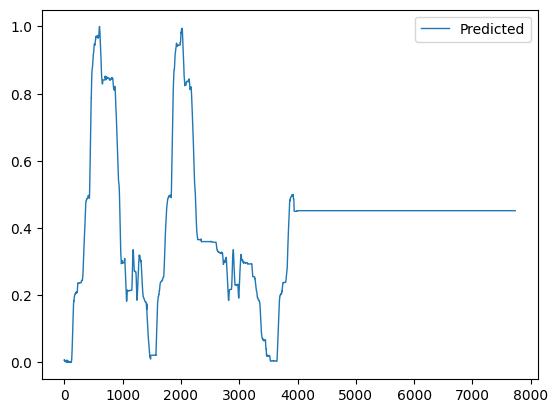

In [20]:
from matplotlib import pyplot

# plot expected vs preducted
# pyplot.plot(y, label='Expected', linewidth=2)
pyplot.plot(np.append(X3[:,0], history), label='Predicted', linewidth=1)
pyplot.legend()
pyplot.show()

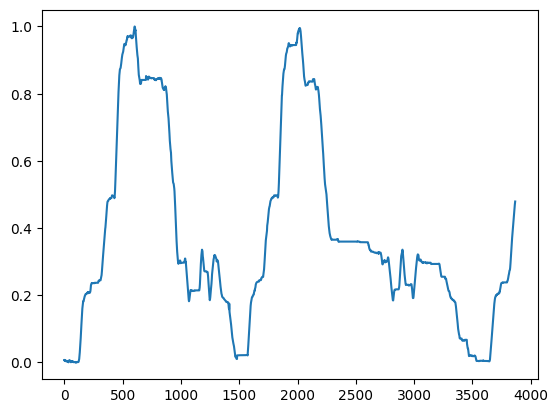

In [21]:
plt.plot(X3[:,0])

# Evaluation Metrics

In [22]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(X3[:,0], history, squared=False)

rmse

0.295662247046918